In [4]:
%load_ext autoreload
%autoreload 2

import polars as pl
import networkx as nx

from src.base_classes.omic_data_loader import OmicDataLoader
from src.data_managers.concat import CatOmicDataManager

from src.gnn_utils.interactions import (
    get_mirna_genes_circrna_interactions, get_mirna_gene_interactions, gg_interactions, pp_interactions
)
import torch

In [5]:
mrna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_disease/mrna",
)
mirna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_disease/mirna_genes",
)
circrna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_disease/circrna",
)
# pirna_loader = OmicDataLoader(
#     data_dir="mds_data/splits_74/pirna",
# )
te_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_disease/te_counts",
)

omic_data_loaders = {
    "mrna": mrna_loader,
    "mirna": mirna_loader,
    "circrna": circrna_loader,
    # # "pirna": pirna_loader,
    # "te": te_loader,
}
odm = CatOmicDataManager(omic_data_loaders, n_splits=5)

In [6]:
from src.evals.xgboost import XGBoostEvaluator

xgb_eval = XGBoostEvaluator(
    data_manager=odm,
    n_trials=60,
    verbose=True,
)
_ = xgb_eval.evaluate()
# xgb_eval.print_best_results()
# xgb_eval.print_best_parameters()
# xgb_eval.save_results(results_file=save_folder, row_name="XGBoost")

/home/lubojjan/DiplomaGeneral/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-11-20 00:02:57,150] A new study created in memory with name: no-name-050d8ed1-d849-4085-853b-c022891d7001
[I 2024-11-20 00:02:57,321] Trial 0 finished with value: 0.6631836987350632 and parameters: {'lambda': 0.0001536662457782512, 'alpha': 0.008748920062145145}. Best is trial 0 with value: 0.6631836987350632.
[I 2024-11-20 00:02:57,467] Trial 1 finished with value: 0.6460639796087643 and parameters: {'lambda': 1.1515916334065606e-05, 'alpha': 0.02817777785450934}. Best is trial 0 with value: 0.6631836987350632.


New best score: 0.663
Best model performance:
Accuracy: 0.906 ± 0.032
F1 Macro: 0.815 ± 0.062
F1 Weighted: 0.898 ± 0.038
[{'acc': 0.8666666666666667, 'f1_macro': np.float64(0.7115384615384616), 'f1_weighted': np.float64(0.8384615384615385)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 0.8666666666666667, 'f1_macro': np.float64(0.7916666666666666), 'f1_weighted': np.float64(0.8666666666666667)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(0.8148148148148148), 'f1_weighted': np.float64(0.9234567901234567)}, {'acc': 0.9285714285714286, 'f1_macro': np.float64(0.8782608695652174), 'f1_weighted': np.float64(0.9341614906832298)}]


[I 2024-11-20 00:02:57,612] Trial 2 finished with value: 0.6139268814359082 and parameters: {'lambda': 4.662735284322028e-05, 'alpha': 0.0393812865472093}. Best is trial 0 with value: 0.6631836987350632.
[I 2024-11-20 00:02:57,753] Trial 3 finished with value: 0.43192671408544425 and parameters: {'lambda': 0.0038163520756470688, 'alpha': 0.10150349703376917}. Best is trial 0 with value: 0.6631836987350632.
[I 2024-11-20 00:02:57,901] Trial 4 finished with value: 0.6460639796087643 and parameters: {'lambda': 4.00401094014086e-07, 'alpha': 0.011142137050590034}. Best is trial 0 with value: 0.6631836987350632.
[I 2024-11-20 00:02:58,066] Trial 5 finished with value: 0.7362098798554709 and parameters: {'lambda': 7.177912599800106e-05, 'alpha': 2.68495476612938e-08}. Best is trial 5 with value: 0.7362098798554709.
[I 2024-11-20 00:02:58,211] Trial 6 finished with value: 0.6305302169311957 and parameters: {'lambda': 9.067327551708692e-07, 'alpha': 0.004466474767453918}. Best is trial 5 with 

New best score: 0.736
Best model performance:
Accuracy: 0.919 ± 0.026
F1 Macro: 0.870 ± 0.020
F1 Weighted: 0.921 ± 0.022
[{'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 0.8666666666666667, 'f1_macro': np.float64(0.8295454545454546), 'f1_weighted': np.float64(0.8772727272727272)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.9386666666666666)}, {'acc': 0.9285714285714286, 'f1_macro': np.float64(0.8782608695652174), 'f1_weighted': np.float64(0.9341614906832298)}]


[I 2024-11-20 00:02:58,391] Trial 7 finished with value: 0.7039337563024542 and parameters: {'lambda': 0.6151308641571935, 'alpha': 1.951035263291866e-06}. Best is trial 5 with value: 0.7362098798554709.
[I 2024-11-20 00:02:58,585] Trial 8 finished with value: 0.7581635155117249 and parameters: {'lambda': 0.04977637553154195, 'alpha': 1.9343283443582424e-08}. Best is trial 8 with value: 0.7581635155117249.
[I 2024-11-20 00:02:58,733] Trial 9 finished with value: 0.6460639796087643 and parameters: {'lambda': 8.212451995213129e-06, 'alpha': 0.017133926456631914}. Best is trial 8 with value: 0.7581635155117249.


New best score: 0.758
Best model performance:
Accuracy: 0.933 ± 0.060
F1 Macro: 0.877 ± 0.114
F1 Weighted: 0.927 ± 0.067
[{'acc': 0.8666666666666667, 'f1_macro': np.float64(0.7115384615384616), 'f1_weighted': np.float64(0.8384615384615385)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 0.8666666666666667, 'f1_macro': np.float64(0.7916666666666666), 'f1_weighted': np.float64(0.8666666666666667)}, {'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}, {'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}]


[I 2024-11-20 00:02:58,900] Trial 10 finished with value: 0.7039337563024542 and parameters: {'lambda': 0.8722557497840804, 'alpha': 2.1376968390599086e-08}. Best is trial 8 with value: 0.7581635155117249.
[I 2024-11-20 00:02:59,089] Trial 11 finished with value: 0.8523939840000002 and parameters: {'lambda': 0.00451670128077975, 'alpha': 1.0070908161505144e-08}. Best is trial 11 with value: 0.8523939840000002.
[I 2024-11-20 00:02:59,241] Trial 12 finished with value: 0.7948768203234714 and parameters: {'lambda': 0.008589408528013645, 'alpha': 8.621933183884285e-07}. Best is trial 11 with value: 0.8523939840000002.


New best score: 0.852
Best model performance:
Accuracy: 0.960 ± 0.033
F1 Macro: 0.928 ± 0.059
F1 Weighted: 0.957 ± 0.035
[{'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}, {'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}]


[I 2024-11-20 00:02:59,402] Trial 13 finished with value: 0.8523939840000002 and parameters: {'lambda': 0.0027129956097559317, 'alpha': 7.375560573984919e-07}. Best is trial 11 with value: 0.8523939840000002.
[I 2024-11-20 00:02:59,559] Trial 14 finished with value: 0.8523939840000002 and parameters: {'lambda': 0.0014659285138713478, 'alpha': 3.342811262588066e-06}. Best is trial 11 with value: 0.8523939840000002.
[I 2024-11-20 00:02:59,713] Trial 15 finished with value: 0.7581635155117249 and parameters: {'lambda': 0.04020724732915571, 'alpha': 6.339389719048149e-05}. Best is trial 11 with value: 0.8523939840000002.
[I 2024-11-20 00:02:59,865] Trial 16 finished with value: 0.6684310669837741 and parameters: {'lambda': 2.8322313590561285e-08, 'alpha': 2.115110345537859e-07}. Best is trial 11 with value: 0.8523939840000002.
[I 2024-11-20 00:03:00,020] Trial 17 finished with value: 0.806425114231087 and parameters: {'lambda': 0.00047491081560950863, 'alpha': 2.5639937090936928e-05}. Best

In [14]:
feat_importances = xgb_eval.get_feature_importances(xgb_eval.best_params)

fi_sorted = dict(sorted(feat_importances.items(), key=lambda x: abs(x[1]), reverse=True))

{'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}
{'ENSG00000181826': [0.05559692531824112, -0.054169394075870514], 'ENSG00000278588': [0.04632212966680527, -0.044104911386966705], 'ENSG00000120594': [0.03686489164829254, -0.03355550393462181], 'ENSG00000121797': [-0.04996650665998459, 0.048594679683446884], 'ENSG00000140398': [0.0563088059425354, -0.056339897215366364], 'ENSG00000168062': [-0.06218557059764862, 0.060765717178583145], 'ENSG00000174307': [-0.06259041279554367, 0.06625481694936752], 'ENSG00000184897': [0.0415569469332695, -0.0424141101539135], 'ENSG00000105497': [-0.045892950147390366, 0.04504718631505966], 'ENSG00000113552': [-0.059393029659986496, 0.059705883264541626], 'ENSG00000188536': [-0.06250694394111633, 0.060900937765836716], 'ENSG00000181004': [-0.04309782385826111, 0.04440683871507645], 'ENSG00000143590': [-0.06258738785982132, 0.06204658001661301], 'ENSG00000006534': [-0.05369599536061287, 0.05185481533408165], 'ENSG

In [15]:
mrna = pl.read_csv("mds_data/preprocessed_74/mrna.csv")
mirna = pl.read_csv("mds_data/preprocessed_74/mirna_genes.csv")

mrna_gene = mrna.select("GENE_NAME", "GENE_ID")
mirna_gene = mirna.select("GENE_NAME", "GENE_ID")

# create one big dict to go from id to name
mrna_dict = dict(zip(mrna_gene["GENE_ID"], mrna_gene["GENE_NAME"]))
mirna_dict = dict(zip(mirna_gene["GENE_ID"], mirna_gene["GENE_NAME"]))

# merge the dicts
mrna_dict.update(mirna_dict)

# rename the keys from fi_sorted to the name of the gene if it exists in mrna_dict
fi_nn = {mrna_dict.get(k, k): v for k, v in fi_sorted.items()}

- [RELT family in cancer RELL1](https://pmc.ncbi.nlm.nih.gov/articles/PMC10603948/)
- [PHLDA3 in hematopoesis](https://pmc.ncbi.nlm.nih.gov/articles/PMC6218282/)
- [PYGM is a glycogen gene, this study mentions the role of that in cancer](https://pmc.ncbi.nlm.nih.gov/articles/PMC7667517/)
- [TUBB is a good biomarker](https://www.frontiersin.org/journals/molecular-biosciences/articles/10.3389/fmolb.2024.1365655/full)

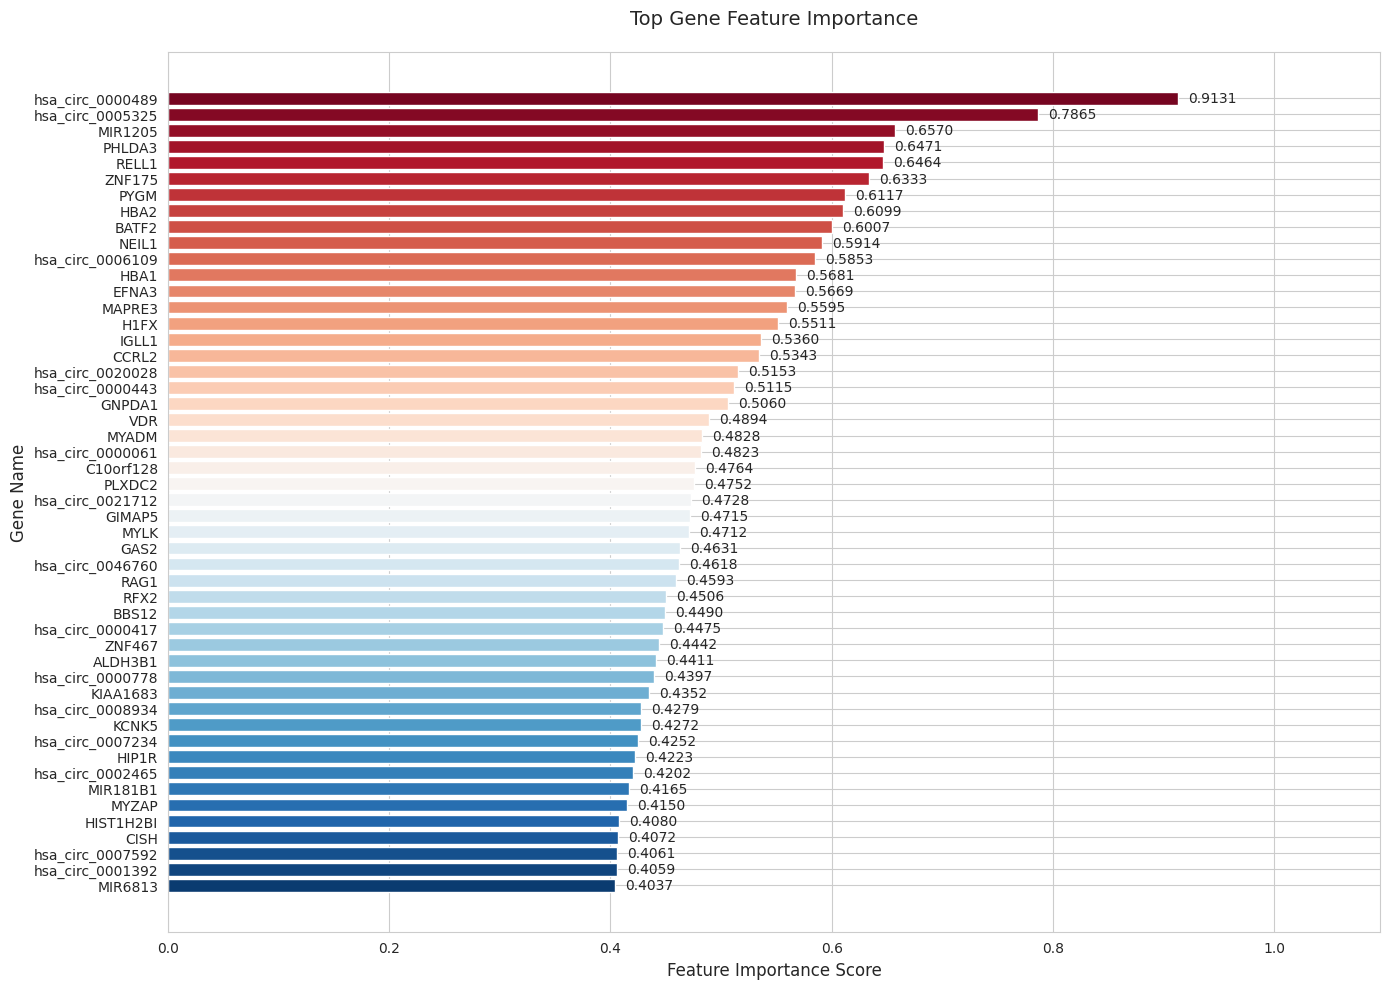

In [ ]:
from src.plotting.feature_importance_plot import plot_top_genes

_ = plot_top_genes(fi_nn, n_genes=50, title="Top Genes")

In [17]:
mrna_dict = {}
mirna_dict = {}
circrna_dict = {}

# go trough the fi_nn dict and sort it into three lists of mrna, mirna and circrna
for k, v in fi_nn.items():
    if k.startswith("MIR"):
        mirna_dict[k] = v
    elif k.startswith("hsa_circ"):
        circrna_dict[k] = v
    else:
        mrna_dict[k] = v

# keep only top 30 out of each list
n_top_genes = 40
mrna_dict = {k: v for k, v in sorted(mrna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}
mirna_dict = {k: v for k, v in sorted(mirna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}
circrna_dict = {k: v for k, v in sorted(circrna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}

In [18]:
mrna_genes = list(mrna_dict.keys())
mirna_genes = list(mirna_dict.keys())
circrna_names = list(circrna_dict.keys())

gg_A = gg_interactions(mrna_genes, mrna_genes)
pp_A = pp_interactions(mrna_genes, mrna_genes)
mrna_A = torch.logical_or(gg_A, pp_A).int()

mirna_gene_A = get_mirna_gene_interactions(mirna_genes, mrna_genes, mirna_mrna_db="interaction_data/mirna_genes_mrna.csv")

# interactions are in a shape of (mirnas, circrnas)
circrna_mirna_A = get_mirna_genes_circrna_interactions(
    mirna_names=mirna_genes,
    circrna_names=circrna_names,
    mirna_circrna_interactions="interaction_data/circrna_mirna_interactions_mirbase.csv",
)

mrna_A.sum(), mirna_gene_A.sum(), circrna_mirna_A.sum()

(tensor(9), tensor(18.), tensor(18.))

8894


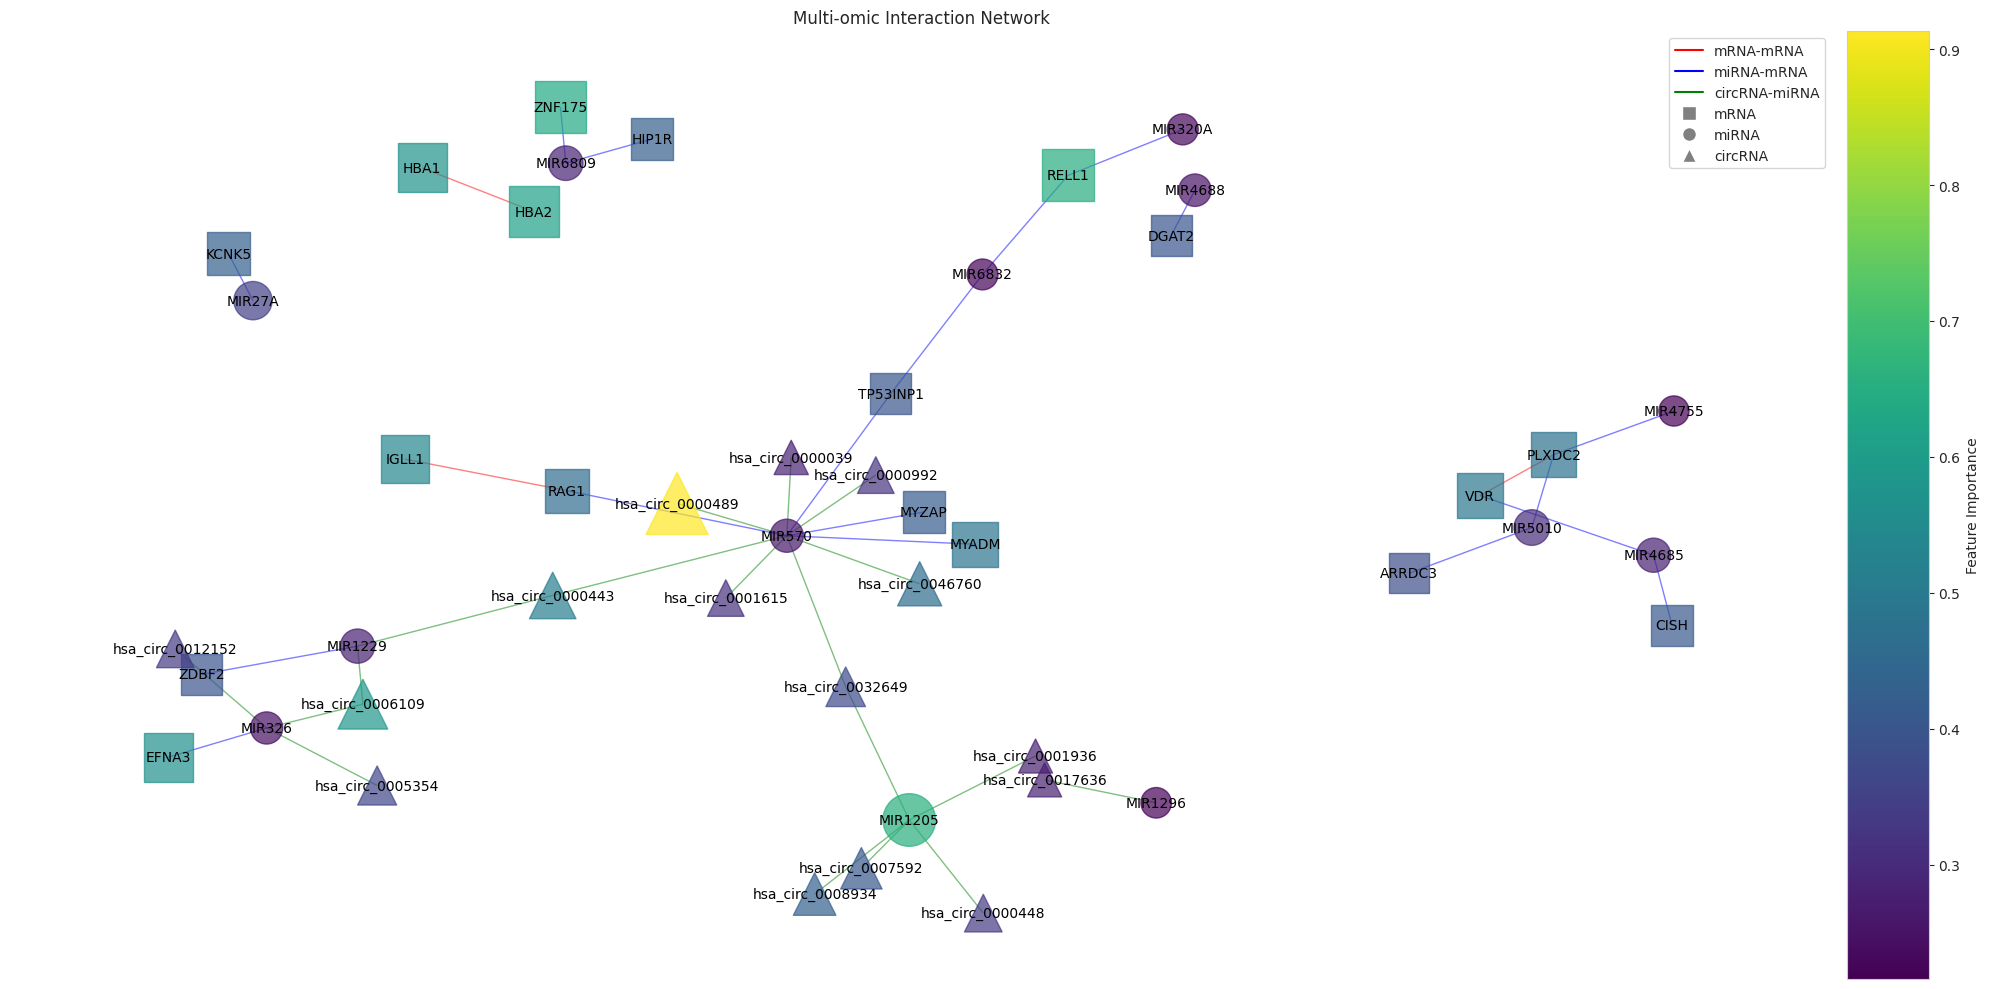

In [ ]:
from src.plotting.graph_plotting import create_multi_omic_network, plot_multi_omic_network

# Example usage:
G = create_multi_omic_network(mrna_dict, mirna_dict, circrna_dict, 
                             mrna_A, mirna_gene_A, circrna_mirna_A)

# generate a random number
seed = 8894 # 7306
# seed = np.random.randint(0, 10000)
print(seed)
fig = plot_multi_omic_network(G, seed=seed)
# plt.show()
fig.savefig('plots/disease_multi_omic_network.png', dpi=400)

[MiR-570 inhibits cell proliferation and glucose metabolism by targeting IRS1 and IRS2 in human chronic myelogenous leukemia](https://pmc.ncbi.nlm.nih.gov/articles/PMC5478775/)